# This code will provide the result of the report.

# 1. Import + Load the data

In [9]:
""" In this document we will test the functions of the folder (dataloader.py, graph_builder.py)"""
%load_ext autoreload
%autoreload 2

 # Initialisation et importation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from dataloader import DataLoader
from graph_builder import GraphBuilder
from visualizations import GraphPlotter
#from graph_analyzer import GraphAnalyzer
print("importation done")

path_train = r"C:\Users\zehav\OneDrive\Bureau\ENS\S5_ARIA\stage_3mois_graph\Projet_github\Projet\Graph_constructor\train.csv"
path_test = r"C:\Users\zehav\OneDrive\Bureau\ENS\S5_ARIA\stage_3mois_graph\Projet_github\Projet\Graph_constructor\test.csv"

L_path_to_W = [
    r"C:\Users\zehav\OneDrive\Bureau\ENS\S5_ARIA\stage_3mois_graph\Projet_github\Projet\examples_graph\correlation\W.txt",
    r"C:\Users\zehav\OneDrive\Bureau\ENS\S5_ARIA\stage_3mois_graph\Projet_github\Projet\examples_graph\distsplines\W.txt",
    r"C:\Users\zehav\OneDrive\Bureau\ENS\S5_ARIA\stage_3mois_graph\Projet_github\Projet\examples_graph\distsplines2\W.txt",
    r"C:\Users\zehav\OneDrive\Bureau\ENS\S5_ARIA\stage_3mois_graph\Projet_github\Projet\examples_graph\dtw\W.txt",
    r"C:\Users\zehav\OneDrive\Bureau\ENS\S5_ARIA\stage_3mois_graph\Projet_github\Projet\examples_graph\gl3sr\W.txt",
    r"C:\Users\zehav\OneDrive\Bureau\ENS\S5_ARIA\stage_3mois_graph\Projet_github\Projet\examples_graph\precision\W.txt",
    r"C:\Users\zehav\OneDrive\Bureau\ENS\S5_ARIA\stage_3mois_graph\Projet_github\Projet\examples_graph\space\W.txt"
]
path_test = r"C:\Users\zehav\OneDrive\Bureau\ENS\S5_ARIA\stage_3mois_graph\Projet_github\Projet\examples_graph\correlation\W.txt"

df_pos = pd.DataFrame(
    {'VILLE': ['LILLE', 'ROUEN', 'PARIS', 'STRASBOURG', 'BREST', 'NANTES', 'ORLEANS', 'DIJON', 'BORDEAUX', 'LYON',
              'TOULOUSE', 'MARSEILLE'],
    'LATITUDE': [50.6365654, 49.4404591, 48.862725, 48.584614, 
                 48.3905283, 47.2186371, 47.9027336, 47.3215806, 
                 44.841225, 45.7578137, 43.6044622, 43.2961743],
    'LONGITUDE': [3.0635282, 1.0939658, 2.287592, 7.7507127, 
                  -4.4860088, -1.5541362, 1.9086066, 5.0414701, 
                  -0.5800364, 4.8320114, 1.4442469, 5.3699525],
    'REGION': ['Hauts_de_France', 'Normandie', 'Ile_de_France', 'Grand_Est', 'Bretagne', 'Pays_de_la_Loire', 
                'Centre_Val_de_Loire', 'Bourgogne_Franche_Comte', 'Nouvelle_Aquitaine', 'Auvergne_Rhone_Alpes', 
                'Occitanie', 'Provence_Alpes_Cote_d_Azur'],
    'SUPERFICIE_REGION': [31813, 29906, 12011, 57433, 27208, 32082, 39151, 47784, 83809, 69711, 72724, 31400],
    'POPULATION_REGION': [5987172, 3307286, 12395148, 5542094, 3402932, 3873096, 2564915, 2785393, 6081985,
                          8153233, 6053548, 5131187]
    })
data = DataLoader(path_train, path_test, kwargs={"start_date": "2018-01-01", "end_date": None})



# Test the GraphBuilder class
dictGraphs = {}
for i in range(len(L_path_to_W)):
    Graph = GraphBuilder(L_path_to_W[i], **df_pos)
    W = Graph.W
    print(W)
    dictGraphs["Graphs"+str(i)] = Graph

    # We are testing different filter of edges 
    #W_threshold = Graph.keep_top_n(60)# keep the 60% of the edges

    W_threshold = Graph.filter_edges_by_energy(0.8) # 80% of the energy
    print(W_threshold)
    # Test the GraphPlotter class
    plotter = GraphPlotter(W_threshold, df_pos)
    #plotter.plot_graph(title="Graph", figsize=(10, 8))
    #plotter.plot_graph_on_map(title="Graph on Map")





    

    
    
    
#signals = get_signals(data.nodes_dataframe, "temp", 1000)
#plot_signals(signals)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
importation done
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.35146544 0.         0.25110038 0.2866427  0.22532785]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.  

# 2. Test of the scalar analyser 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


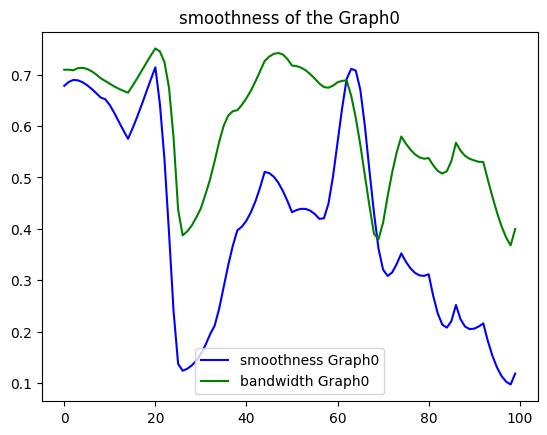

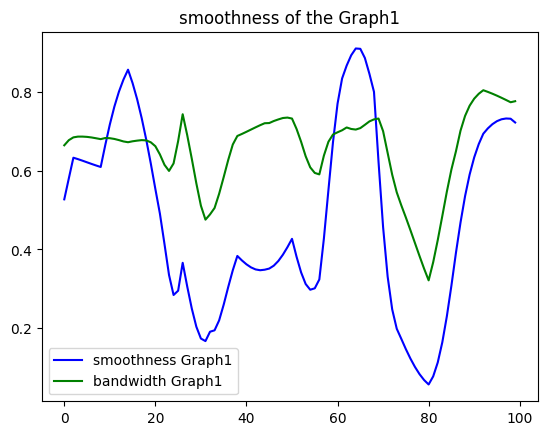

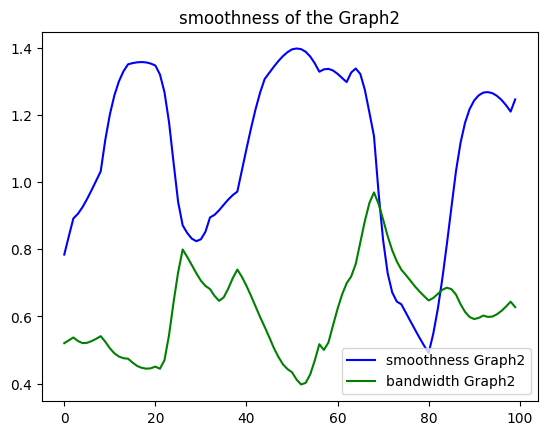

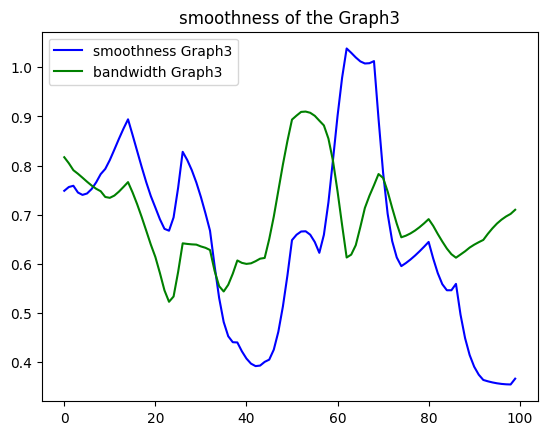

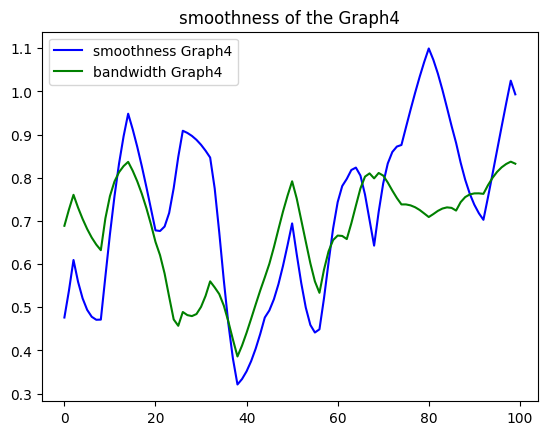

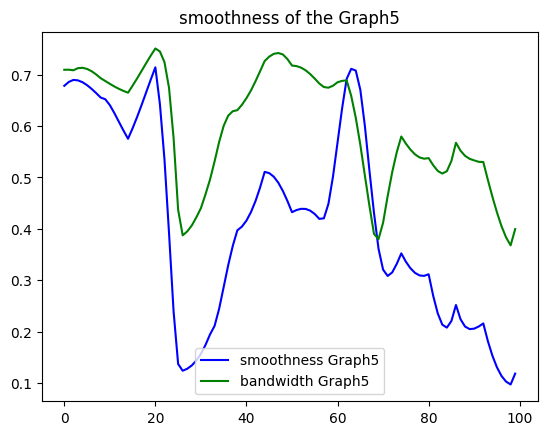

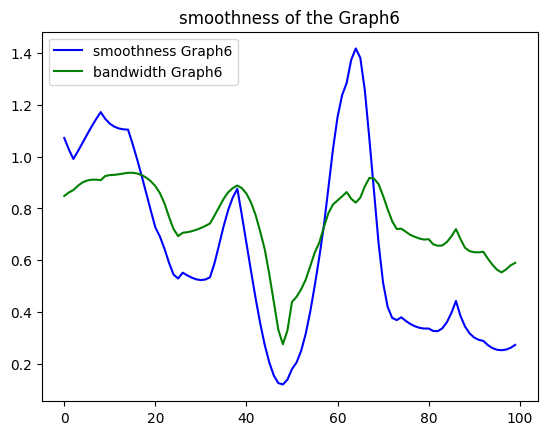

In [18]:
%load_ext autoreload
%autoreload 2
from graph_scalar_analyzer import GraphScalarAnalyzer

nodes_features = data.nodes_dataframe
name_column = "temp"
row = 1000
# Test the GraphScalarAnalyzer class
for i in range(len(L_path_to_W)):
    #Calculating the features of the graph over the time
    Lsmoothness = []
    Lbandwidth = []
    for t in range (100) :
        graph_scalar = GraphScalarAnalyzer(dictGraphs["Graphs" + str(i)] , nodes_features, name_column, t , **df_pos)
        Lsmoothness.append(graph_scalar.smoothness)
        Lbandwidth.append(graph_scalar.bandwith_general)
    plt.title("smoothness of the Graph"+str(i))
    plt.plot(Lsmoothness, 'b' , label = "smoothness Graph"+str(i))
    plt.plot(Lbandwidth,'g', label = "bandwidth Graph"+str(i))
    plt.legend()
    plt.show()
    
    # plt.title("bandwidth of the Graph"+str(i))
    # plt.plot(Lbandwidth,'g', label = "bandwidth Graph"+str(i))
    # plt.legend()
    # plt.show()

# 3. Test of the Series Analyzer

In [39]:
%load_ext autoreload
%autoreload 2

from graph_series_analyzer import GraphSeriesAnalyzer
import torch
import torch.nn as nn

class Autoencoder(nn.Module):
    def __init__(self, nsize=1000, latent_size=32, deepness=3):
        super(Autoencoder, self).__init__()
        
        # Calcul du facteur pour réduire la taille
        factor = (nsize / latent_size) ** (1 / deepness)  # Réduction progressive
        
        #  Encoder
        self.encoder_layers = []
        for i in range(deepness - 1):
            in_size = int(round(nsize / factor**(i)))
            out_size = int(round(nsize / factor**(i + 1)))
            self.encoder_layers.append(nn.Linear(in_size, out_size))
            self.encoder_layers.append(nn.ReLU())
        self.encoder_layers.append(nn.Linear(int(round(nsize / factor**(deepness - 1))), latent_size))
        self.encoder = nn.Sequential(*self.encoder_layers)
        
        #  Decoder
        self.decoder_layers = []
        for i in range(deepness - 1):
            in_size = int(round(latent_size * factor**(i)))
            out_size = int(round(latent_size * factor**(i + 1)))
            self.decoder_layers.append(nn.Linear(in_size, out_size))
            self.decoder_layers.append(nn.ReLU())
        self.decoder_layers.append(nn.Linear(int(round(latent_size * factor**(deepness - 1))), nsize))
        self.decoder = nn.Sequential(*self.decoder_layers)
        
    def forward(self, x):
        x= x.float()
        x = self.encoder(x)  # Compress input
        #x = (x - torch.mean(x)) / torch.std(x)
        x = self.decoder(x)  # Reconstruct input
        
        x = (x - torch.mean(x)) / torch.std(x)
        return x
    
    def encode(self, x):
        x= x.float()
        x = self.encoder(x)
        x = (x - torch.mean(x)) / torch.std(x)
        return x
    
    def decode(self, x):
        x= x.float()
        x = self.decoder(x)
        #x = (x - torch.mean(x)) / torch.std(x)
        return x
    
    def predict(self, x):
        x= x.float()
        x = self.encoder(x)
        meanx = torch.mean(x)
        stdx = torch.std(x)
        x = (x - meanx) / stdx
        x = self.decoder(x)
        x = x * stdx + meanx
        return x



nodes_features = data.nodes_dataframe
name_column = "temp"
nsize = 2000
AE_path = "AE_model.pth"

# Test the GraphSeriesAnalyzer class
for i in range(len(L_path_to_W)):
    graph_series = GraphSeriesAnalyzer(dictGraphs["Graphs" + str(i)] , nodes_features, name_column, nsize, AE_path, **df_pos)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
RMSE 238.6074756754759
MAPE tensor(6.5949e+12, dtype=torch.float64, grad_fn=<MulBackward0>)
Done
RMSE 238.6074756754759
MAPE tensor(6.5949e+12, dtype=torch.float64, grad_fn=<MulBackward0>)


c:\Users\zehav\OneDrive\Bureau\ENS\S5_ARIA\stage_3mois_graph\Projet_github\Projet\Final_code\graph_series_analyzer.py:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.

Done


c:\Users\zehav\OneDrive\Bureau\ENS\S5_ARIA\stage_3mois_graph\Projet_github\Projet\Final_code\graph_series_analyzer.py:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.

RMSE 238.6074756754759
MAPE tensor(6.5949e+12, dtype=torch.float64, grad_fn=<MulBackward0>)


c:\Users\zehav\OneDrive\Bureau\ENS\S5_ARIA\stage_3mois_graph\Projet_github\Projet\Final_code\graph_series_analyzer.py:115: RuntimeWarning: divide by zero encountered in power
  D_inv_sqrt = sp.diags(np.power(D.diagonal(), -0.5), format="csr")
c:\Users\zehav\OneDrive\Bureau\ENS\S5_ARIA\stage_3mois_graph\Projet_github\.venv\Lib\site-packages\scipy\sparse\_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Done
RMSE 238.6074756754759
MAPE tensor(6.5949e+12, dtype=torch.float64, grad_fn=<MulBackward0>)


c:\Users\zehav\OneDrive\Bureau\ENS\S5_ARIA\stage_3mois_graph\Projet_github\Projet\Final_code\graph_series_analyzer.py:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.

Done


c:\Users\zehav\OneDrive\Bureau\ENS\S5_ARIA\stage_3mois_graph\Projet_github\Projet\Final_code\graph_series_analyzer.py:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.

RMSE 238.6074756754759
MAPE tensor(6.5949e+12, dtype=torch.float64, grad_fn=<MulBackward0>)


c:\Users\zehav\OneDrive\Bureau\ENS\S5_ARIA\stage_3mois_graph\Projet_github\Projet\Final_code\graph_series_analyzer.py:115: RuntimeWarning: divide by zero encountered in power
  D_inv_sqrt = sp.diags(np.power(D.diagonal(), -0.5), format="csr")
c:\Users\zehav\OneDrive\Bureau\ENS\S5_ARIA\stage_3mois_graph\Projet_github\.venv\Lib\site-packages\scipy\sparse\_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Done
RMSE 238.6074756754759
MAPE tensor(6.5949e+12, dtype=torch.float64, grad_fn=<MulBackward0>)


c:\Users\zehav\OneDrive\Bureau\ENS\S5_ARIA\stage_3mois_graph\Projet_github\Projet\Final_code\graph_series_analyzer.py:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.

Done
RMSE 238.6074756754759
MAPE tensor(6.5949e+12, dtype=torch.float64, grad_fn=<MulBackward0>)


c:\Users\zehav\OneDrive\Bureau\ENS\S5_ARIA\stage_3mois_graph\Projet_github\Projet\Final_code\graph_series_analyzer.py:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.

Done
